# Digit Recognizer
Learning computer vision fundamentals with the famous MNIST data

* Defining the problem statement
* collecting the data
* preprocessing
* cnn

## 1. Defining the problem statement
MNIST ("Modified National Institute of Standards and Technology") is the classic dataset of handwritten images used for benchmarking classification algorithms.

Our goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. 

## 2. Collecting the data
Training set and test set are downloaded from [Kaggle]("https://www.kaggle.com/c/digit-recognizer")

Let's import the necessary header files needed for this problem

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization,Conv2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler  
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [4]:
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

In [7]:
test_df.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [8]:
train_df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


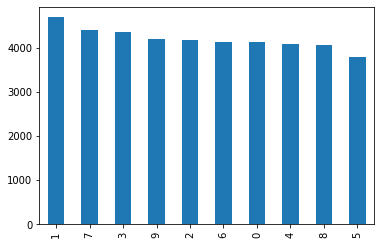

In [9]:
train_df['label'].value_counts().plot(kind = 'bar')

This plot clearly implies that the given dataset is a balanced dataset

Let's split the dataset into input and Label

In [10]:
X_train = np.array(train_df.drop('label', axis = 1))
Y_train = np.array(train_df['label'])
X_test = np.array(test_df)

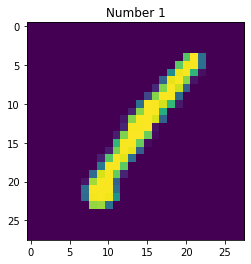

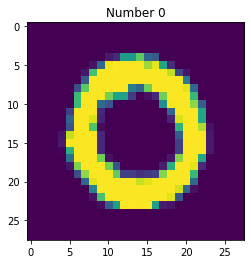

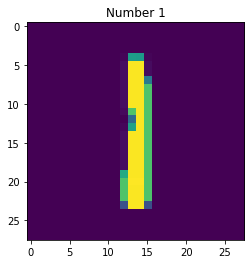

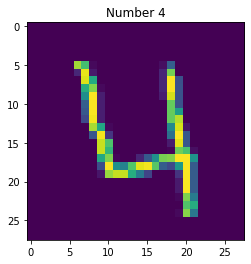

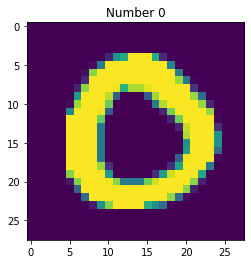

In [11]:
for i in range(2):
    plt.imshow(X_train[i].reshape(28,28))
    plt.title(f'Number {Y_train[i]}')
    plt.show()

# 3. Preprocessing
## 3.1. Normalization
We perform a grayscale normalization as CNN converge faster on [0..1] data than on [0..255].

In [12]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print('X_test shape:',X_test.shape)
print('Number of images in train set', X_train.shape[0])
print('Number of images in test set', X_test.shape[0])

X_train shape: (42000, 28, 28, 1)
X_test shape: (28000, 28, 28, 1)
Number of images in train set 42000
Number of images in test set 28000


## 3.2. One hot encoding

In [13]:
Y_train = to_categorical(Y_train)
print("Shape of ytrain after encoding: ", Y_train.shape)

Shape of ytrain after encoding:  (42000, 10)


## 3.3. Splitting the dataset

In [14]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train,
                                              Y_train, 
                                              test_size=0.1,
                                              random_state=1,
                                              shuffle=True,
                                              stratify=Y_train
                                             )
print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)

(37800, 28, 28, 1) (37800, 10) (4200, 28, 28, 1) (4200, 10)


## 3.4. Data Augmentation

Data augmentation is a strategy that enables us to significantly increase the diversity of data available for training models, without actually collecting new data. Data augmentation techniques such as cropping, padding, and horizontal flipping are commonly used to train large neural networks.Data Augmentation can be done easily using ImageDataGenerator in keras

In [15]:
datagen = ImageDataGenerator(           
          rotation_range=10,                   
          zoom_range = 0.1,                     
          width_shift_range=0.1,               
          height_shift_range=0.1)                 

datagen.fit(X_train)

# 4. CNN
## 4.1 Defining the model

I used lenet5 architecture with the following improvements:

![Lenet](https://miro.medium.com/max/1580/1*6C0wlygR-GAnAwheozI1KQ.png)
    
* Adding learnable pooling layer first using A 5*5 convolution with stride 2. Reducing number of parameters 
* 3x3 filters replace the 5x5 filters. 
* ReLU activation replaces sigmoid.
* Batch normalization is added
* Dropout is added
* More feature maps (channels) are added

In [36]:
model = Sequential()

model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu', input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [44]:
s = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
model_log = 0
epochs = 30
batch=64
model_log = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch),
                                epochs = epochs,
                                steps_per_epoch = X_train.shape[0]//batch,  
                                validation_data = (X_val,Y_val), 
                                verbose=1, 
                                callbacks=[s])
print("Epochs: ",epochs," ","Train_accuracy: ",max(model_log.history['accuracy'])," Validation_accuracy: ",max(model_log.history['val_accuracy']))

Epoch 1/30
590/590 [==============================] - 246s 417ms/step - loss: 0.0945 - accuracy: 0.9718 - val_loss: 0.0503 - val_accuracy: 0.9883
Epoch 2/30
590/590 [==============================] - 258s 438ms/step - loss: 0.0850 - accuracy: 0.9744 - val_loss: 0.0325 - val_accuracy: 0.9912
Epoch 3/30
590/590 [==============================] - 255s 433ms/step - loss: 0.0777 - accuracy: 0.9766 - val_loss: 0.0371 - val_accuracy: 0.9888
Epoch 4/30
590/590 [==============================] - 257s 435ms/step - loss: 0.0746 - accuracy: 0.9780 - val_loss: 0.0375 - val_accuracy: 0.9898
Epoch 5/30
590/590 [==============================] - 308s 522ms/step - loss: 0.0665 - accuracy: 0.9806 - val_loss: 0.0365 - val_accuracy: 0.9902
Epoch 6/30
590/590 [==============================] - 267s 453ms/step - loss: 0.0633 - accuracy: 0.9812 - val_loss: 0.0266 - val_accuracy: 0.9929
Epoch 7/30
590/590 [==============================] - 267s 453ms/step - loss: 0.0577 - accuracy: 0.9824 - val_loss: 0.0336 -

In [45]:
model.save("my_model.h5")

In [50]:
# from tensorflow.keras.models import load_model

In [51]:
# model = load_model('my_model.h5')

In [56]:
results = model.predict(X_test)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
results = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
results.to_csv("/predictions.csv",index=False)

Exception: Data must be 1-dimensional